## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = mouse_results.nunique()["Mouse ID"]

#prints mice count so we can confirm that our merged data set has 249 mice
print(mice_count)

249


In [88]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ID = mouse_results.loc[mouse_results.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()


In [89]:
#shows all of our duplicate mice, we are lucky and we only have one mouse w a duplicate 
mouse_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupli_mouse = mouse_results.loc[mouse_results["Mouse ID"] == "g989"]

dupli_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#use isin to get only the mice that arent in our mouse_ID array that has the list of duplicate IDs
#we set it equal to false so it retruns values not equal to the dupli mouse IDs
mouse_clean = mouse_results[mouse_results["Mouse ID"].isin(mouse_ID) == False]
mouse_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
#check to make sure we removed only the one duplicate mouse
mice_count2 = mouse_clean.nunique()["Mouse ID"]

mice_count2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = mouse_clean.groupby(["Drug Regimen"])

regimen_mean = regimen["Tumor Volume (mm3)"].mean()
regimen_median = regimen["Tumor Volume (mm3)"].median()
regimen_var = regimen["Tumor Volume (mm3)"].var()
regimen_std = regimen["Tumor Volume (mm3)"].std()
regimen_sem = regimen[["Tumor Volume (mm3)"]].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stat_sum_regimen = pd.DataFrame({"Mean": regimen_mean, 
                                 "Median": regimen_median, 
                                 "Variance": regimen_var, 
                                 "Standard Deviation": regimen_std, 
                                 "Standard Error of Mean": regimen_sem["Tumor Volume (mm3)"]})

stat_sum_regimen


,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen["Tumor Volume (mm3)"].agg({"mean", "median", "var", "std", "sem"})

,sem,mean,median,var,std
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,24.947764,4.994774
Ceftamin,0.469821,52.591172,51.776157,39.290177,6.268188
Infubinol,0.492236,52.884795,51.820584,43.128684,6.567243
Ketapril,0.603860,55.235638,53.698743,68.553577,8.279709
Naftisol,0.596466,54.331565,52.509285,66.173479,8.134708
Placebo,0.581331,54.033581,52.288934,61.168083,7.821003
Propriva,0.544332,52.320930,50.446266,43.852013,6.622085
Ramicane,0.320955,40.216745,40.673236,23.486704,4.846308
Stelasyn,0.573111,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

Text(0.5, 1.0, 'Data Points Per Treatment')

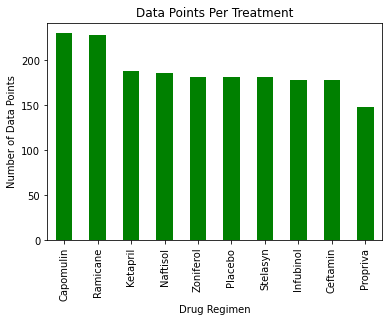

In [39]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#counts the number of times a "Drug Regimen" occurs to get all of the timepoints for each
regimen_count = mouse_clean["Drug Regimen"].value_counts()

#plots our data
pd_bar = regimen_count.plot.bar(color = "green")

#labels our graph
pd_bar.set_xlabel("Drug Regimen")
pd_bar.set_ylabel("Number of Data Points")
pd_bar.set_title("Data Points Per Treatment")


<BarContainer object of 10 artists>

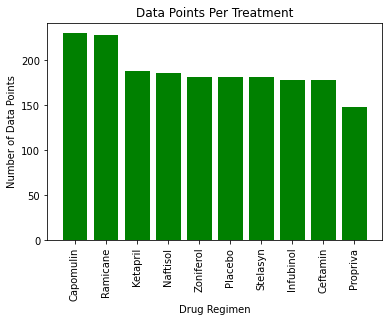

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#use len on regimen_count from previous step to find the coordinates of our x axis 
x_axis = np.arange(len(regimen_count))

#sets our tick locations 
tick_locations = [value for value in x_axis]
#plots our labels of each bar, rotated 90 degrees so we can read them
plt.xticks(tick_locations, regimen_count.index, rotation = 90)

#labels our graph
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Treatment")

#plots our graph
plt.bar(x_axis, regimen_count, color="g")


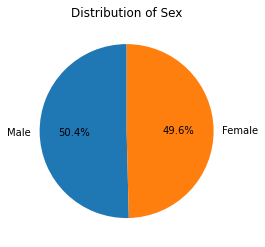

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#drops duplicate mouse ID values because not every mouse appears the same number of times as we can infer from our bar chart
#we keep the first occurance of each mouse
unique_mouse = mouse_clean.drop_duplicates(subset = ["Mouse ID"], keep = "first")

#for all of our mice it counts up how many of each sex we have
sex_count = unique_mouse["Sex"].value_counts()
 
#checks to make sure the total number of mice is 248
#print(sex_count)

#rotates pie chart to be unright, adds the percent of sex on the chart, titles the chart and hides the y axis label
pd_pie = sex_count.plot.pie(startangle = 90, autopct="%1.1f%%", title = "Distribution of Sex", ylabel = "")

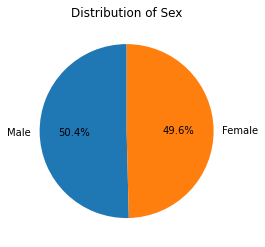

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#rotates pie chart to be unright, adds the percent of sex on the chart, and titles the chart
#reuse sex_count from before
plt.pie(sex_count, labels=sex_count.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treat_data = []

# Start by getting the last (greatest) timepoint for each mouse
#drop duplicate mouse ID rows but we keep the last row which will give us the last timepoint for each mouse
#we can do this because the data for each mouse is organized in ascending time order
last_uni_mouse = mouse_clean.drop_duplicates(subset = ["Mouse ID"], keep = "last")

#loops through our treatments in our list
for treatments in treatments: 
    #gets the data of our mice for each treatment
    treat = last_uni_mouse[last_uni_mouse["Drug Regimen"] == treatments]
    #gets our last tumor volume and puts it into our list of treatment values
    treat_val = treat["Tumor Volume (mm3)"]
    treat_data.append(treat_val)
    
    #calculates our interquartile ranges
    quartiles = treat_val.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #prints out our IQR for a treatment
    print(f"IQR for {treatments}: {iqr}")
    
    #calculates and prints our upper and lower bound
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    #checks to see if we have have any outliers, check for values beyond the upper bound and lower bound
    #prints the number of outliers for a treatment
    upper_outlier_count = treat_val.loc[(treat["Tumor Volume (mm3)"] >= upper_bound)].count()
    lower_outlier_count = treat_val.loc[(treat["Tumor Volume (mm3)"] <= lower_bound)].count()
    print(f"Number of outliers for {treatments}: {lower_outlier_count + upper_outlier_count}")
    #print empty line for readability 
    print()


IQR for Capomulin: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Number of outliers for Capomulin: 0

IQR for Ramicane: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Number of outliers for Ramicane: 0

IQR for Infubinol: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Number of outliers for Infubinol: 1

IQR for Ceftamin: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Number of outliers for Ceftamin: 0



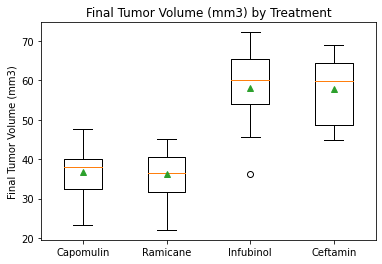

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume (mm3) by Treatment")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.boxplot(treat_data, showmeans=True)
plt.show()

## Line and Scatter Plots

(40.0, 48.0)

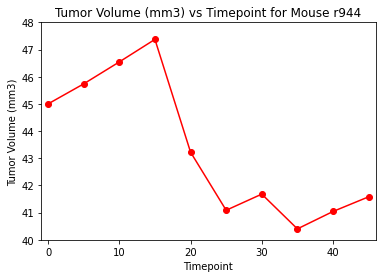

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#filtering mice IDs that used Capomulin to pick one
capomulin = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin"]
#shows ALL mice IDs that used capomulin, so we can have options 
#capomulin["Mouse ID"].unique()

#filters our data to our desired mouse, named him mickey just cause
Mickey = mouse_clean.loc[mouse_clean["Mouse ID"] == "r944"]

#plotting our data for our particular mouse based off time point and tumor volume
volume_time_Mickey = plt.plot(Mickey["Timepoint"], Mickey["Tumor Volume (mm3)"], color="red", label="Mouse r944", marker = "o")

#labeling our graph
plt.title("Tumor Volume (mm3) vs Timepoint for Mouse r944")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

#setting our x and y axis limits
plt.xlim(-1,46)
plt.ylim(40,48)

Text(0, 0.5, 'Weight (g)')

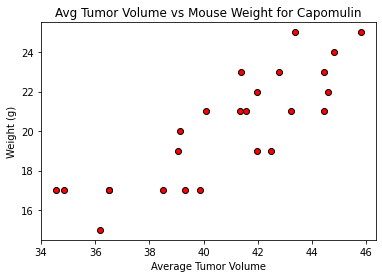

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#creating a new dataframe for our average tumor volume for each mouse
avg_tumor_vol = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).rename(columns= {"Tumor Volume (mm3)": "Average Tumor Volume"})

#merging our average tumor volume with our capomulin data frame
avg_tumor_vol_capomulin = pd.merge(capomulin, avg_tumor_vol, on= "Mouse ID")

#dropping dupes of mouse IDs and keeping the last value that occurs so we get the final weight for each mouse
final_avg_tumor_capomulin = avg_tumor_vol_capomulin.drop_duplicates(subset = ["Mouse ID"], keep = "last")

#creating scatter plot
plt.scatter(final_avg_tumor_capomulin["Average Tumor Volume"], final_avg_tumor_capomulin["Weight (g)"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.title("Avg Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight (g)")


In [35]:
#check to make sure our data merged correctly, making sure all of our mice have the correct avg tumor size 
#avg_tumor_vol


In [17]:
#they do have the correct tumor size for each mouse! yay!
#final_avg_tumor_capomulin

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
C_slope, C_int, C_r, C_p, C_std_err = st.linregress(final_avg_tumor_capomulin["Average Tumor Volume"], 
                                                            final_avg_tumor_capomulin["Weight (g)"])

#creating our line equation
C_fit = C_slope * final_avg_tumor_capomulin["Average Tumor Volume"] + C_int

#making our equation as a string so we can annotate our graph
C_line = "y = " + str(round(C_slope,2)) + "x + " + str(round(C_int, 2))

Text(0, 0.5, 'Weight (g)')

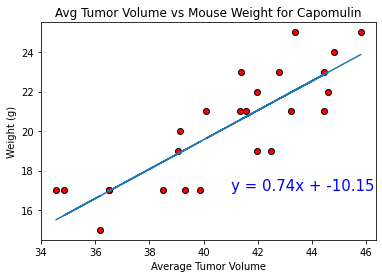

In [30]:
#plotting our regres line and annotating the equation into our graph
plt.plot(final_avg_tumor_capomulin["Average Tumor Volume"],C_fit)
plt.annotate(C_line,(41,17),fontsize=15,color="blue")

#same scatterplot as above
plt.scatter(final_avg_tumor_capomulin["Average Tumor Volume"], final_avg_tumor_capomulin["Weight (g)"], marker="o", facecolors="red", edgecolors="black")

#labeling our graph
plt.title("Avg Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight (g)")

In [34]:
#finding the correlation coefficient and printing the result
correlation_coeff = st.pearsonr(final_avg_tumor_capomulin["Average Tumor Volume"], final_avg_tumor_capomulin["Weight (g)"])[0]
print(f"The correlation coefficient for mouse weight and average tumor volume is {round(correlation_coeff,2)}.")

The correlation coefficient for mouse weight and average tumor volume is 0.84.
